In [6]:
mapped_genes_path = '/Users/carolinb/Documents/104 Masterthesis/klebsiella-pipeline/example/thesis/Kp_std/03_refinement/step1-extension/genes_mapped.csv'

chem_prop_file = '/Users/carolinb/Documents/104 Masterthesis/klebsiella-pipeline/example/data/MetaNetX/chem_prop.tsv'
chem_xref_file = '/Users/carolinb/Documents/104 Masterthesis/klebsiella-pipeline/example/data/MetaNetX/chem_xref.tsv'
reac_prop_file = '/Users/carolinb/Documents/104 Masterthesis/klebsiella-pipeline/example/data/MetaNetX/reac_prop.tsv'
reac_xref_file = '/Users/carolinb/Documents/104 Masterthesis/klebsiella-pipeline/example/data/MetaNetX/reac_xref.tsv'

In [7]:
draft_model_path = '/Users/carolinb/Documents/104 Masterthesis/klebsiella-pipeline/example/thesis/Kp_std/02_generate_draft_model/Kp_std_draft.xml'



### Testing the modules

In [8]:
# bidirectional_blast
#
# works now

from specimen.core import bidirectional_blast

template='/Users/brune/Documents/11_Test_Data/test_SPECIMEN/data/annotated_genomes/GCF_000240185.1.gbff'
input = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/data/annotated_genomes/Kp_MD01/AB-1_S128.faa'
dir='/Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing'
template_name=None
input_name=None
temp_header='protein_id'
in_header='locus_tag'
threads=2
extra_info=['locus_tag', 'product', 'protein_id']
sensitivity='more-sensitive'

bidirectional_blast.run(template, input, dir,
                        template_name, input_name, 
                        temp_header, in_header, 
                        threads, extra_info, sensitivity)

ModuleNotFoundError: No module named 'specimen.core'

In [ ]:
# generate_draft_model
#
# works again

from specimen.core import generate_draft_model

template = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/data/template-models/_iKPM22LL_with_minimal_medium_anaerobic.xml'
bpbbh = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/thesis/Kp_std/01_bidirectional_blast/AB-1_S128_GCF_000240185.1_bbh.tsv'
dir = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing'
edit_names='dot-to-underscore'
pid=80.0
name='test_kp'
medium='default'
namespace='BiGG'
memote=False

generate_draft_model.run(template,bpbbh,dir,edit_names,
                         pid,name,medium,namespace,memote)


generate draft model
################################################################################

Given directory already exists.

# ------------------
# filter by PID
# ------------------
	4867 set as 1 (= homologs), 310 set as 0 
	total time: 0.0005040168762207031s

# --------------------
# generate draft model
# --------------------
	remove absent (low PID) genes
	...................................................................
	number of deleted genes: 56
	number of essential genes (not deleted): 2
	number of genes not found in the model: 208
	...................................................................
	rename found homologs
	...................................................................
	total number of found homologs: 4867
	number of homologs found and renamed in model: 1974
	number of additional homologs found and added to model: 27
	...................................................................
	check not renamed genes
	...............................

In [ ]:
# refinement - extension
#
#

from specimen.core.refinement import extension

draft = ''
gene_list = ''
fasta = ''
db = ''
dir = ''
mnx_chem_prop = ''
mnx_chem_xref = ''
mnx_reac_prop = ''
mnx_reac_xref = ''
ncbi_map = ''
ncbi_dat = ''
id='locus_tag'
sensitivity='more-sensitive'
coverage=95.0
pid=90.0
threads:int=2
exclude_dna=True
exclude_rna=True
memote=False

extension.run(draft, gene_list, fasta, db, dir, 
              mnx_chem_prop, mnx_chem_xref, mnx_reac_prop, mnx_reac_xref,
              ncbi_map, ncbi_dat, id, sensitivity, coverage, pid,threads,
              exclude_dna,exclude_rna, memote)

In [ ]:
# refinement - cleanup
#
# gapfilling untested, everything else runs fine

from specimen.core.refinement import cleanup

model = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/thesis/Kp_std/03_refinement/step1-extension/Kp_std_extended.xml'
dir = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing'
biocyc_db = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/data/BioCyc/Reactions_MetaCyc.txt'
check_dupl_reac = True
check_dupl_meta = 'default'
remove_unused_meta = False 
remove_dupl_reac = True
remove_dupl_meta = True
universal = None
media_path = None 
namespace = 'BiGG' 
growth_threshold = 0.05
iterations=3
chunk_size=10000
memote = False

cleanup.run(model, dir, biocyc_db, 
            check_dupl_reac, check_dupl_meta, remove_unused_meta, 
            remove_dupl_reac, remove_dupl_meta,
            universal, media_path, namespace, 
            growth_threshold, iterations, chunk_size,
            memote)


refinement step 2: clean-up
################################################################################

Creating new directory /Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing/step2-clean-up

# --------------------
# check direction
# --------------------
	time: 0.0711212158203125s

# ----------------------------------
# complete BioCyc/MetaCyc annotation
# ----------------------------------
	time: 0.002468109130859375s

# -----------------
# resolve duplicates
# -----------------
	Special case -Duplicate NH4/NH3- detected.
	Trying to solve by additionally removing reactions containing both metabolites.
	Duplicate metabolite nh3_c found. Replaced with nh4_c.
	Duplicate metabolite istnt_c found. Replaced with isetac_c.
	Duplicate metabolite fcl__L_c_i found (duplicate to fcl__L_c based on annotation).
		Kept, as reaction containing both metabolites was found.
	Duplicate metabolite sulfac_c found. Replaced with sula_c.
	Duplicate metabolite 4met2obut_c found. Replaced wit

In [ ]:
# refinement - annotation
#
# - problems with SBOannotator

from specimen.core.refinement import annotation

model = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/thesis/Kp_std/03_refinement/step2-clean-up/Kp_std_clean.xml'
dir = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing'
kegg_viaEC = False
kegg_viaRC = False
memote = True

annotation.run(model, dir, kegg_viaEC, kegg_viaRC, memote)


refinement step 3: annotation
################################################################################

Given directory already has required structure.

# ------------------
# add SBO annotation
# ------------------


KeyboardInterrupt: 

In [ ]:
# refinement - smoothing
#
# mcc untested, otherwise seems to work fine

from specimen.core.refinement import smoothing

genome = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/data/annotated_genomes/Kp_MD01/AB-1_S128.fna'
model = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/thesis/Kp_std/03_refinement/step3-annotation/Kp_std_annotated.xml'
dir = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing'
mcc ='skip'
egc_solver = 'greedy'
namespace='BiGG'
dna_weight_frac=0.023
ion_weight_frac=0.05
memote=True

smoothing.run(genome, model, dir, mcc, egc_solver, namespace, dna_weight_frac, ion_weight_frac,memote)

/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/pydantic/_internal/_config.py:322: UserWarning: Valid config keys have changed in V2:
* 'underscore_attrs_are_private' has been removed
  warnings.warn(message, UserWarning)



refinement step 4: smoothing
################################################################################

Given directory already has required structure.
Given directory already has required structure.

# ------------------------
# mass and charge curation
# ------------------------
	skipped

# ---------------------------------------------
# # check for energy generating cycles
# ---------------------------------------------
GreedyEGCSolver:
No EGCs present, nothing to solve.
	time: 0.5987248420715332s

# ----------
# adjust BOF
# ----------


/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/BOFdat/core/dna.py:19: UserWarning: 439 handles in the genome file.This may indicate that your genome is not completely assembled. 
BOFdat will parse the contigs but the stoichiometric coefficients may not be accurate.
  warnings.warn('%s handles in the genome file.This may indicate that your genome is not completely assembled. \nBOFdat will parse the contigs but the stoichiometric coefficients may not be accurate.'%(len(genome),))


Generating list of solvable metabolites


                which is outside of the 1e-03 margin from 1 mmol / g[CDW] / h.
                


	time: 9.048682928085327s

# ----------
# save model
# ----------
	saving to: /Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing/step4-smoothing/Kp_std_smooth.xml

# -------------------
# Analyse with MEMOTE
# -------------------
============================= test session starts ==============================
platform darwin -- Python 3.10.13, pytest-8.0.0, pluggy-1.4.0
rootdir: /Users/brune
plugins: anyio-4.2.0
collected 146 items / 1 skipped

../../../../miniconda3/envs/sprg/lib/python3.10/site-packages/memote/suite/tests/test_annotation.py . [  0%]
..FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...FF.....F.....FF.F.F.FF.FFFFF         [ 44%]
../../../../miniconda3/envs/sprg/lib/python3.10/site-packages/memote/suite/tests/test_basic.py . [ 45%]
.....F...........FFFFF                                                   [ 60%]
../../../../miniconda3/envs/sprg/lib/python3.10/site-packages/memote/suite/tests/test_biomass.py . [ 60%]
......F.F                                                        

In [ ]:
# validation
#
# seems to work

from specimen.core import validation

dir = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing'
model_path = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/thesis/Kp_std/03_refinement/step4-smoothing/Kp_std_smooth.xml'
tests = None
run_all = True

validation.run(dir, model_path, tests=None, run_all=True)

/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/pydantic/_internal/_config.py:322: UserWarning: Valid config keys have changed in V2:
* 'underscore_attrs_are_private' has been removed
  warnings.warn(message, UserWarning)



analysis
################################################################################

Given directory already has required structure.

# ------------------
# general statistics
# ------------------


/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/cobra/core/metabolite.py:129: UserWarning: invalid character '*' found in formula 'HO*'
  warn(f"invalid character '*' found in formula '{self.formula}'")
/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/cobra/core/metabolite.py:129: UserWarning: invalid character '*' found in formula 'C8H14NOS2*'
  warn(f"invalid character '*' found in formula '{self.formula}'")
/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/cobra/core/metabolite.py:129: UserWarning: invalid character '*' found in formula 'HO2*'
  warn(f"invalid character '*' found in formula '{self.formula}'")
/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/cobra/core/metabolite.py:129: UserWarning: invalid character '*' found in formula 'C8H16NOS2*'
  warn(f"invalid character '*' found in formula '{self.formula}'")
/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/cobra/core/metabolite.py:129: UserWarning: invalid


# -----------------
# pathway analysis
# -----------------
Given directory already has required structure.

# ---------------
# growth analysis
# ---------------


/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/cobra/medium/minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
/Users/brune/Documents/10_Code/refinegems/build/__editable__.refineGEMs-1.4.2-py3-none-any/refinegems/analysis/growth.py:752: UserWarning: Amino acid Glycine has no identifier for your chosen namespace BiGG. Please contact support if you want to add one.
  warnings.warn(warn_str)
/Users/brune/Documents/10_Code/refinegems/build/__editable__.refineGEMs-1.4.2-py3-none-any/refinegems/analysis/growth.py:752: UserWarning: Amino acid Glycine has no identifier for your chosen namespace BiGG. Please contact support if you want to add one.
  warnings.warn(warn_str)
/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/cobra/medium/minimal_medium.py:112: FutureWarning: The default dtype for empty Series will b

total runtime: 39.94427013397217


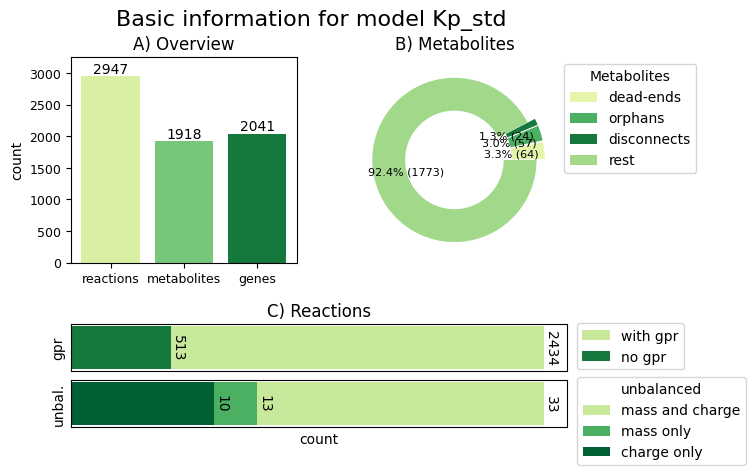

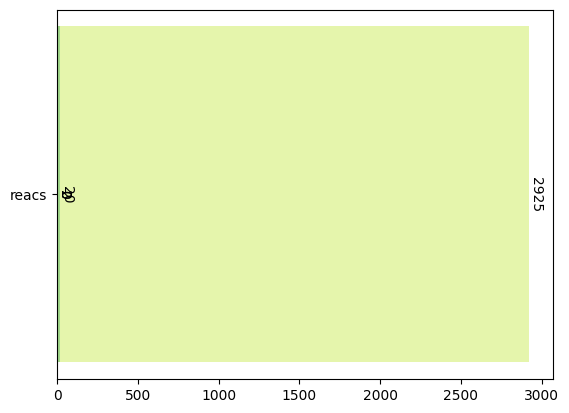

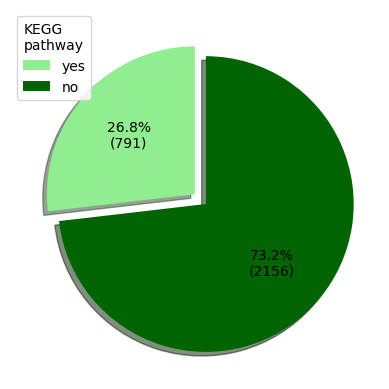

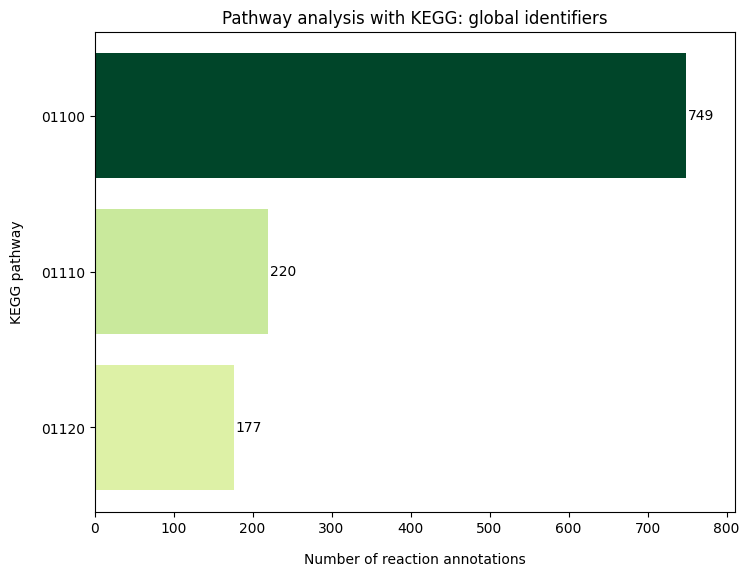

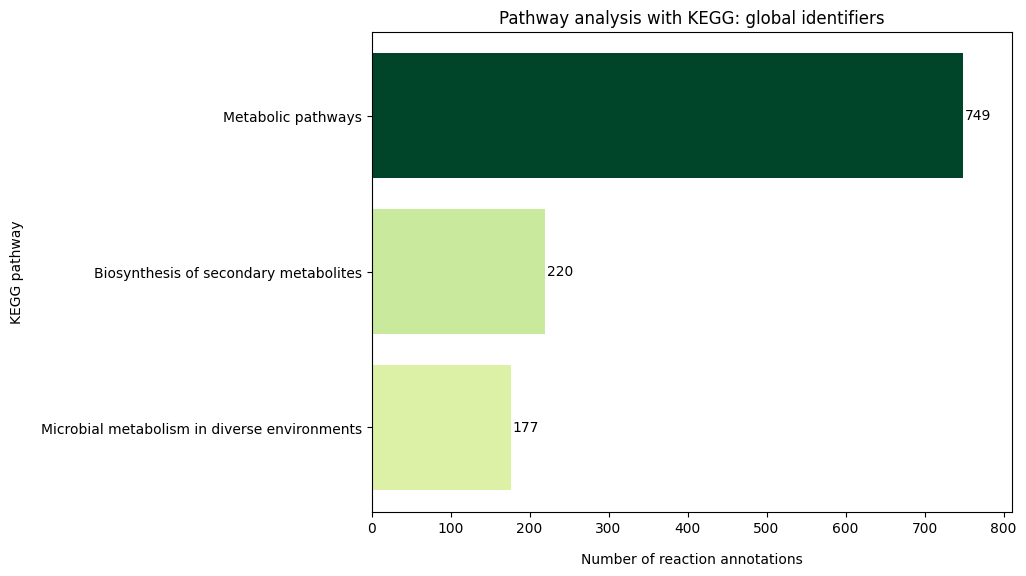

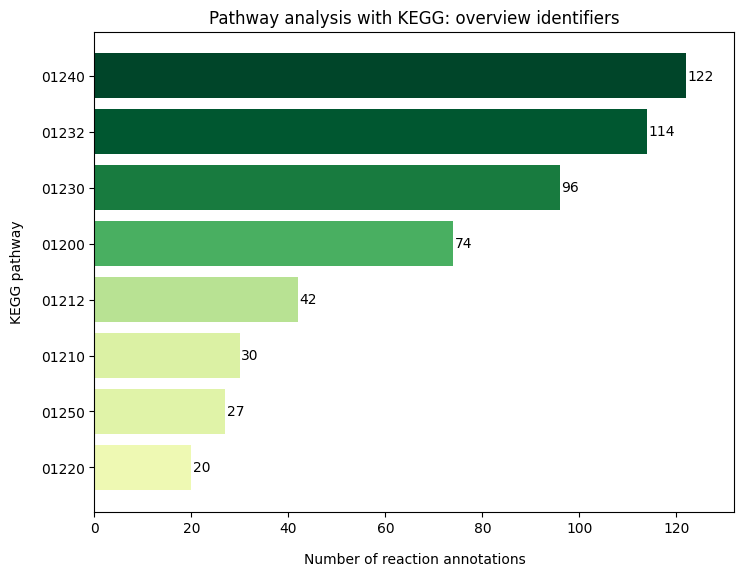

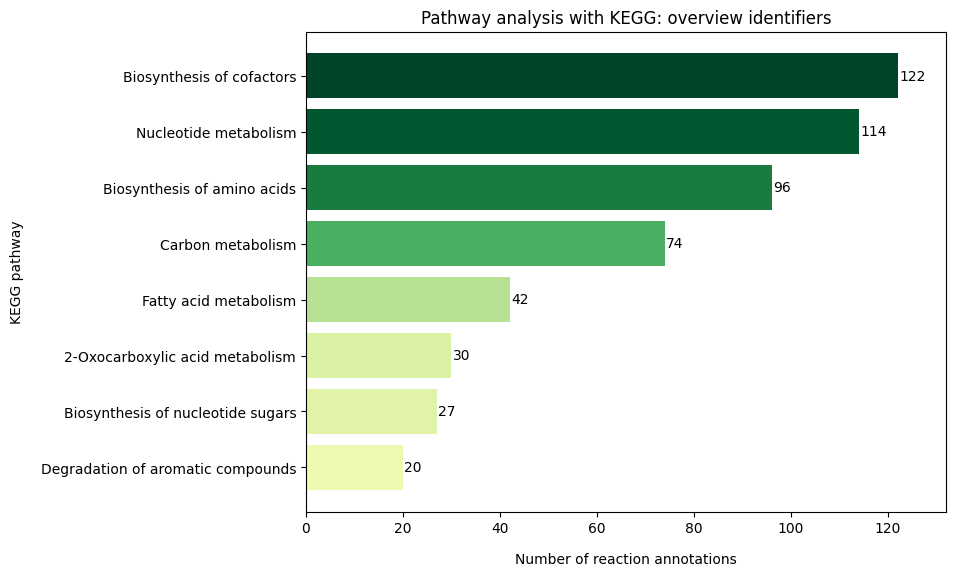

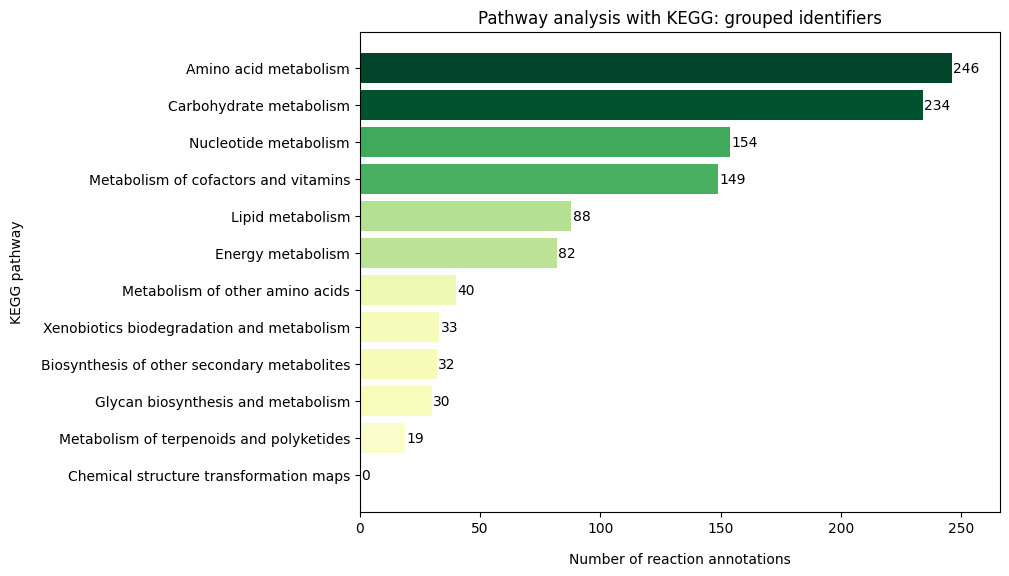

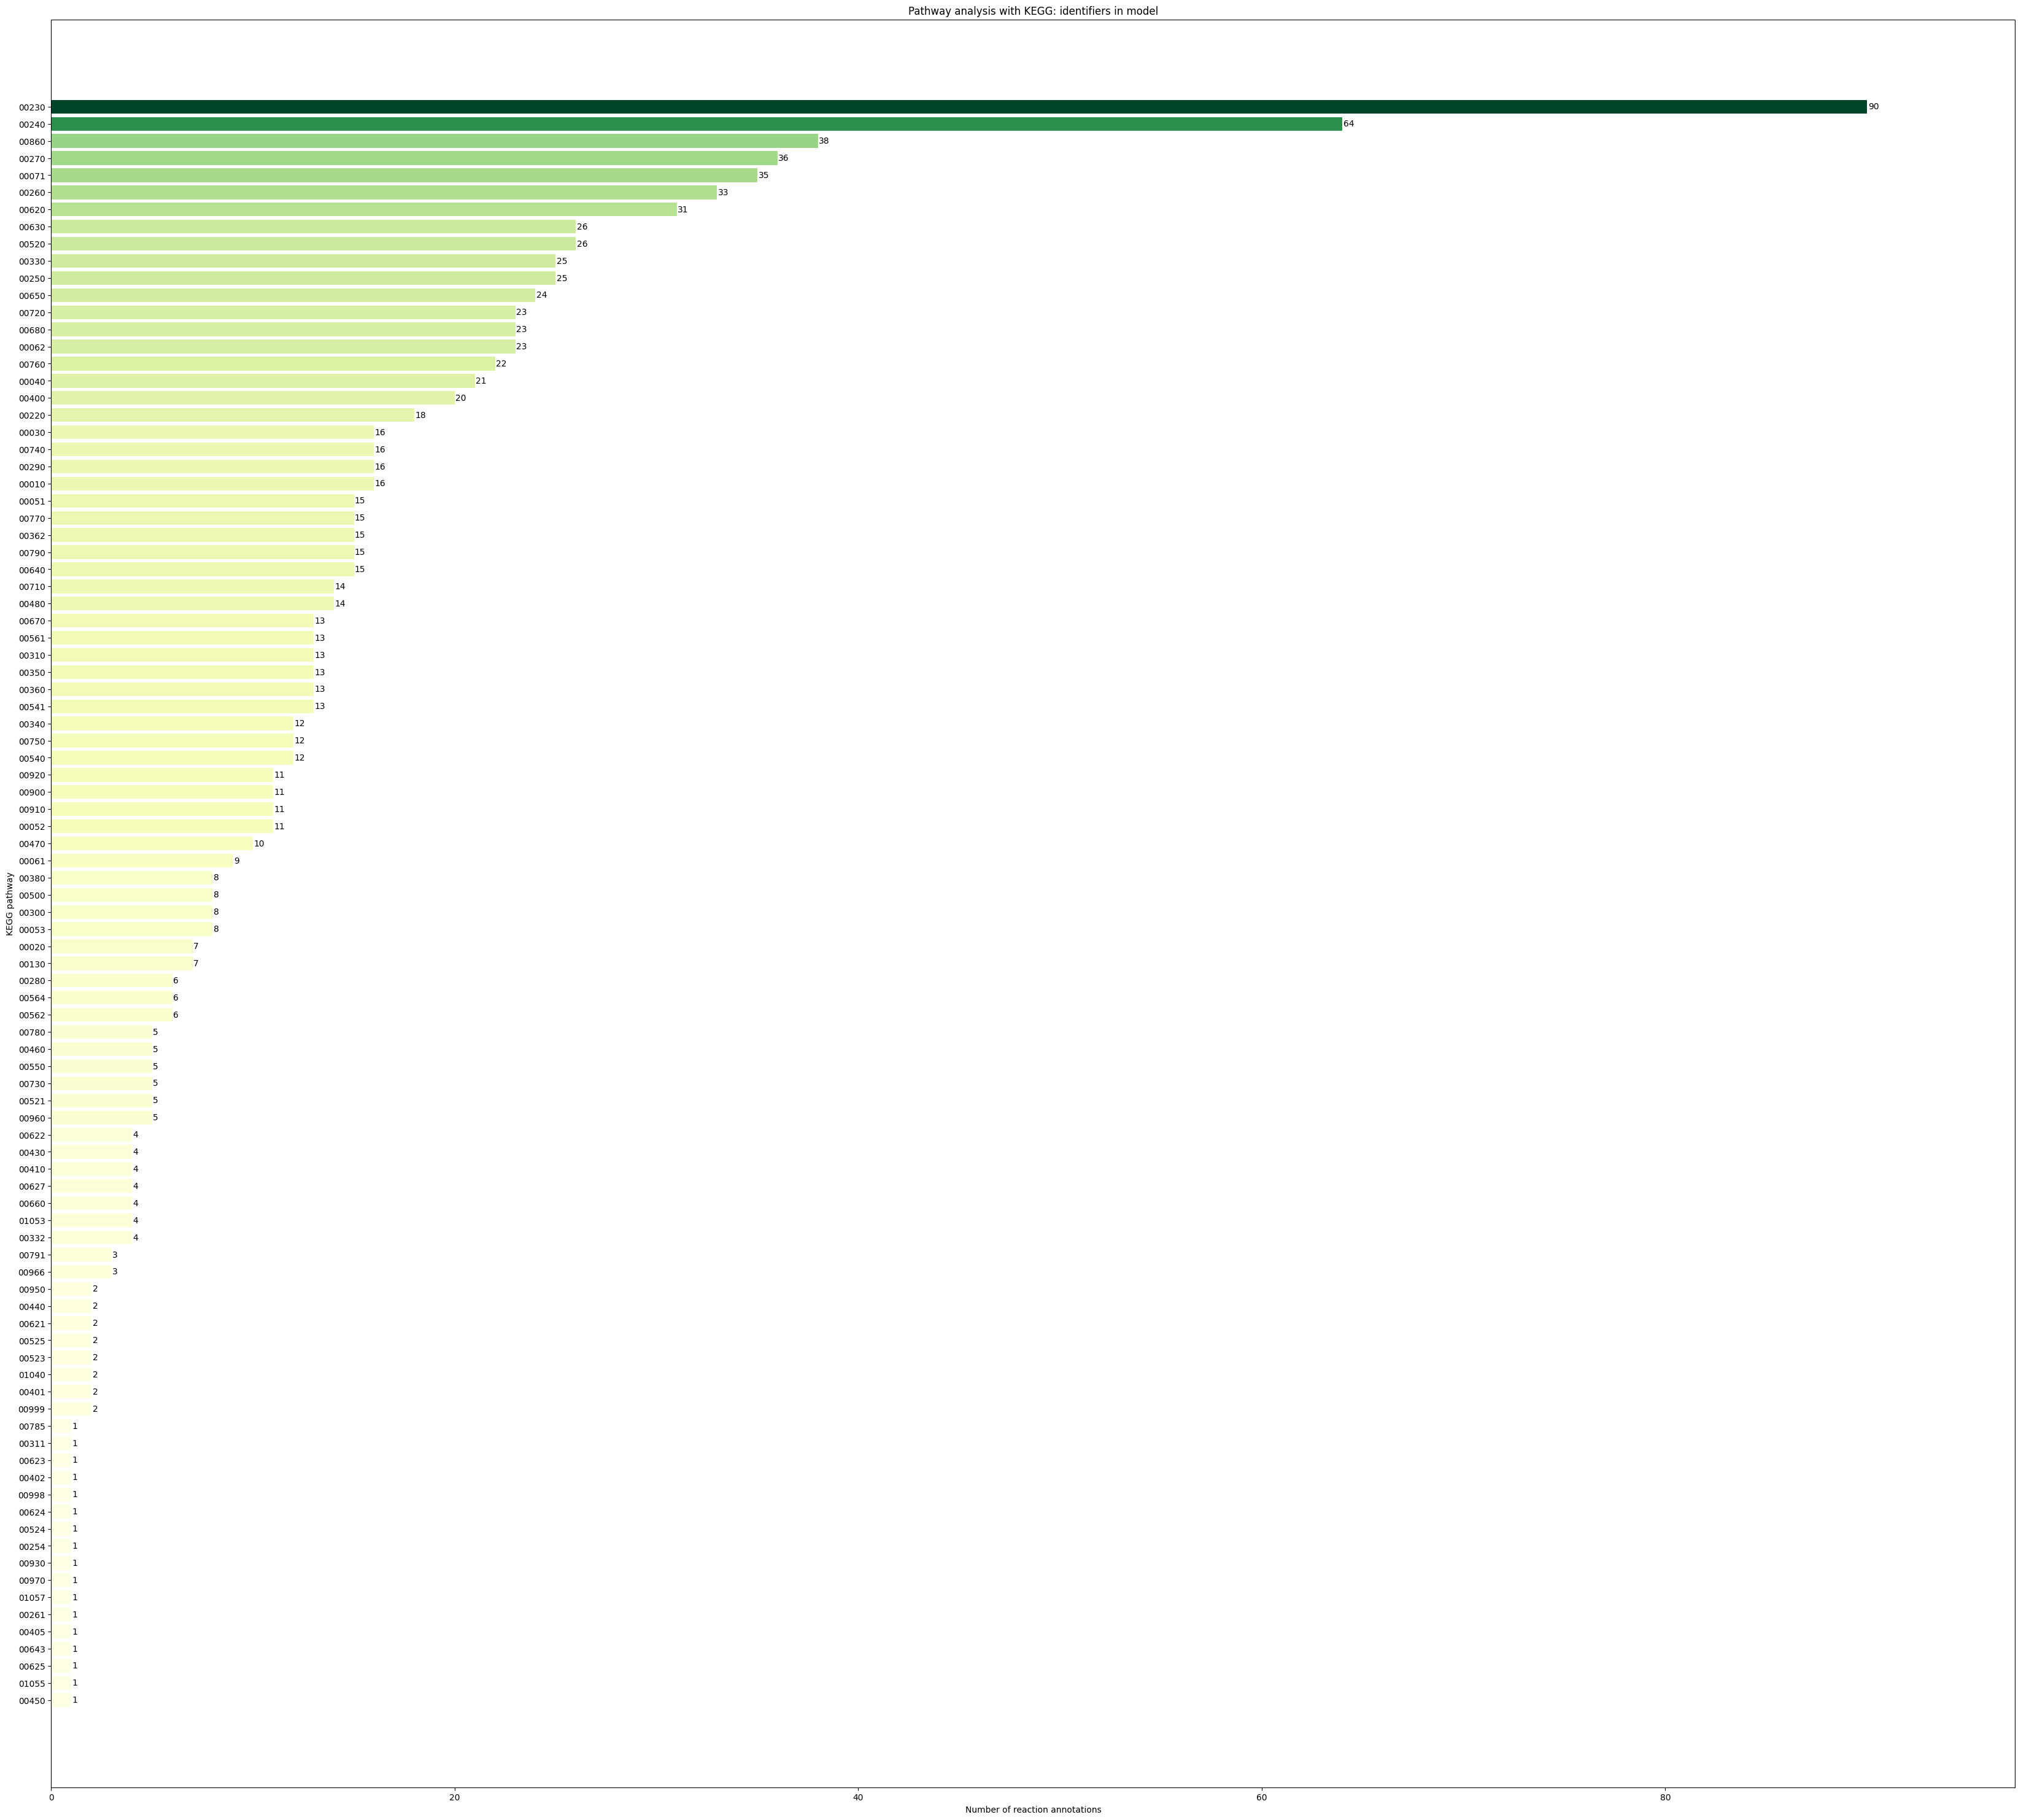

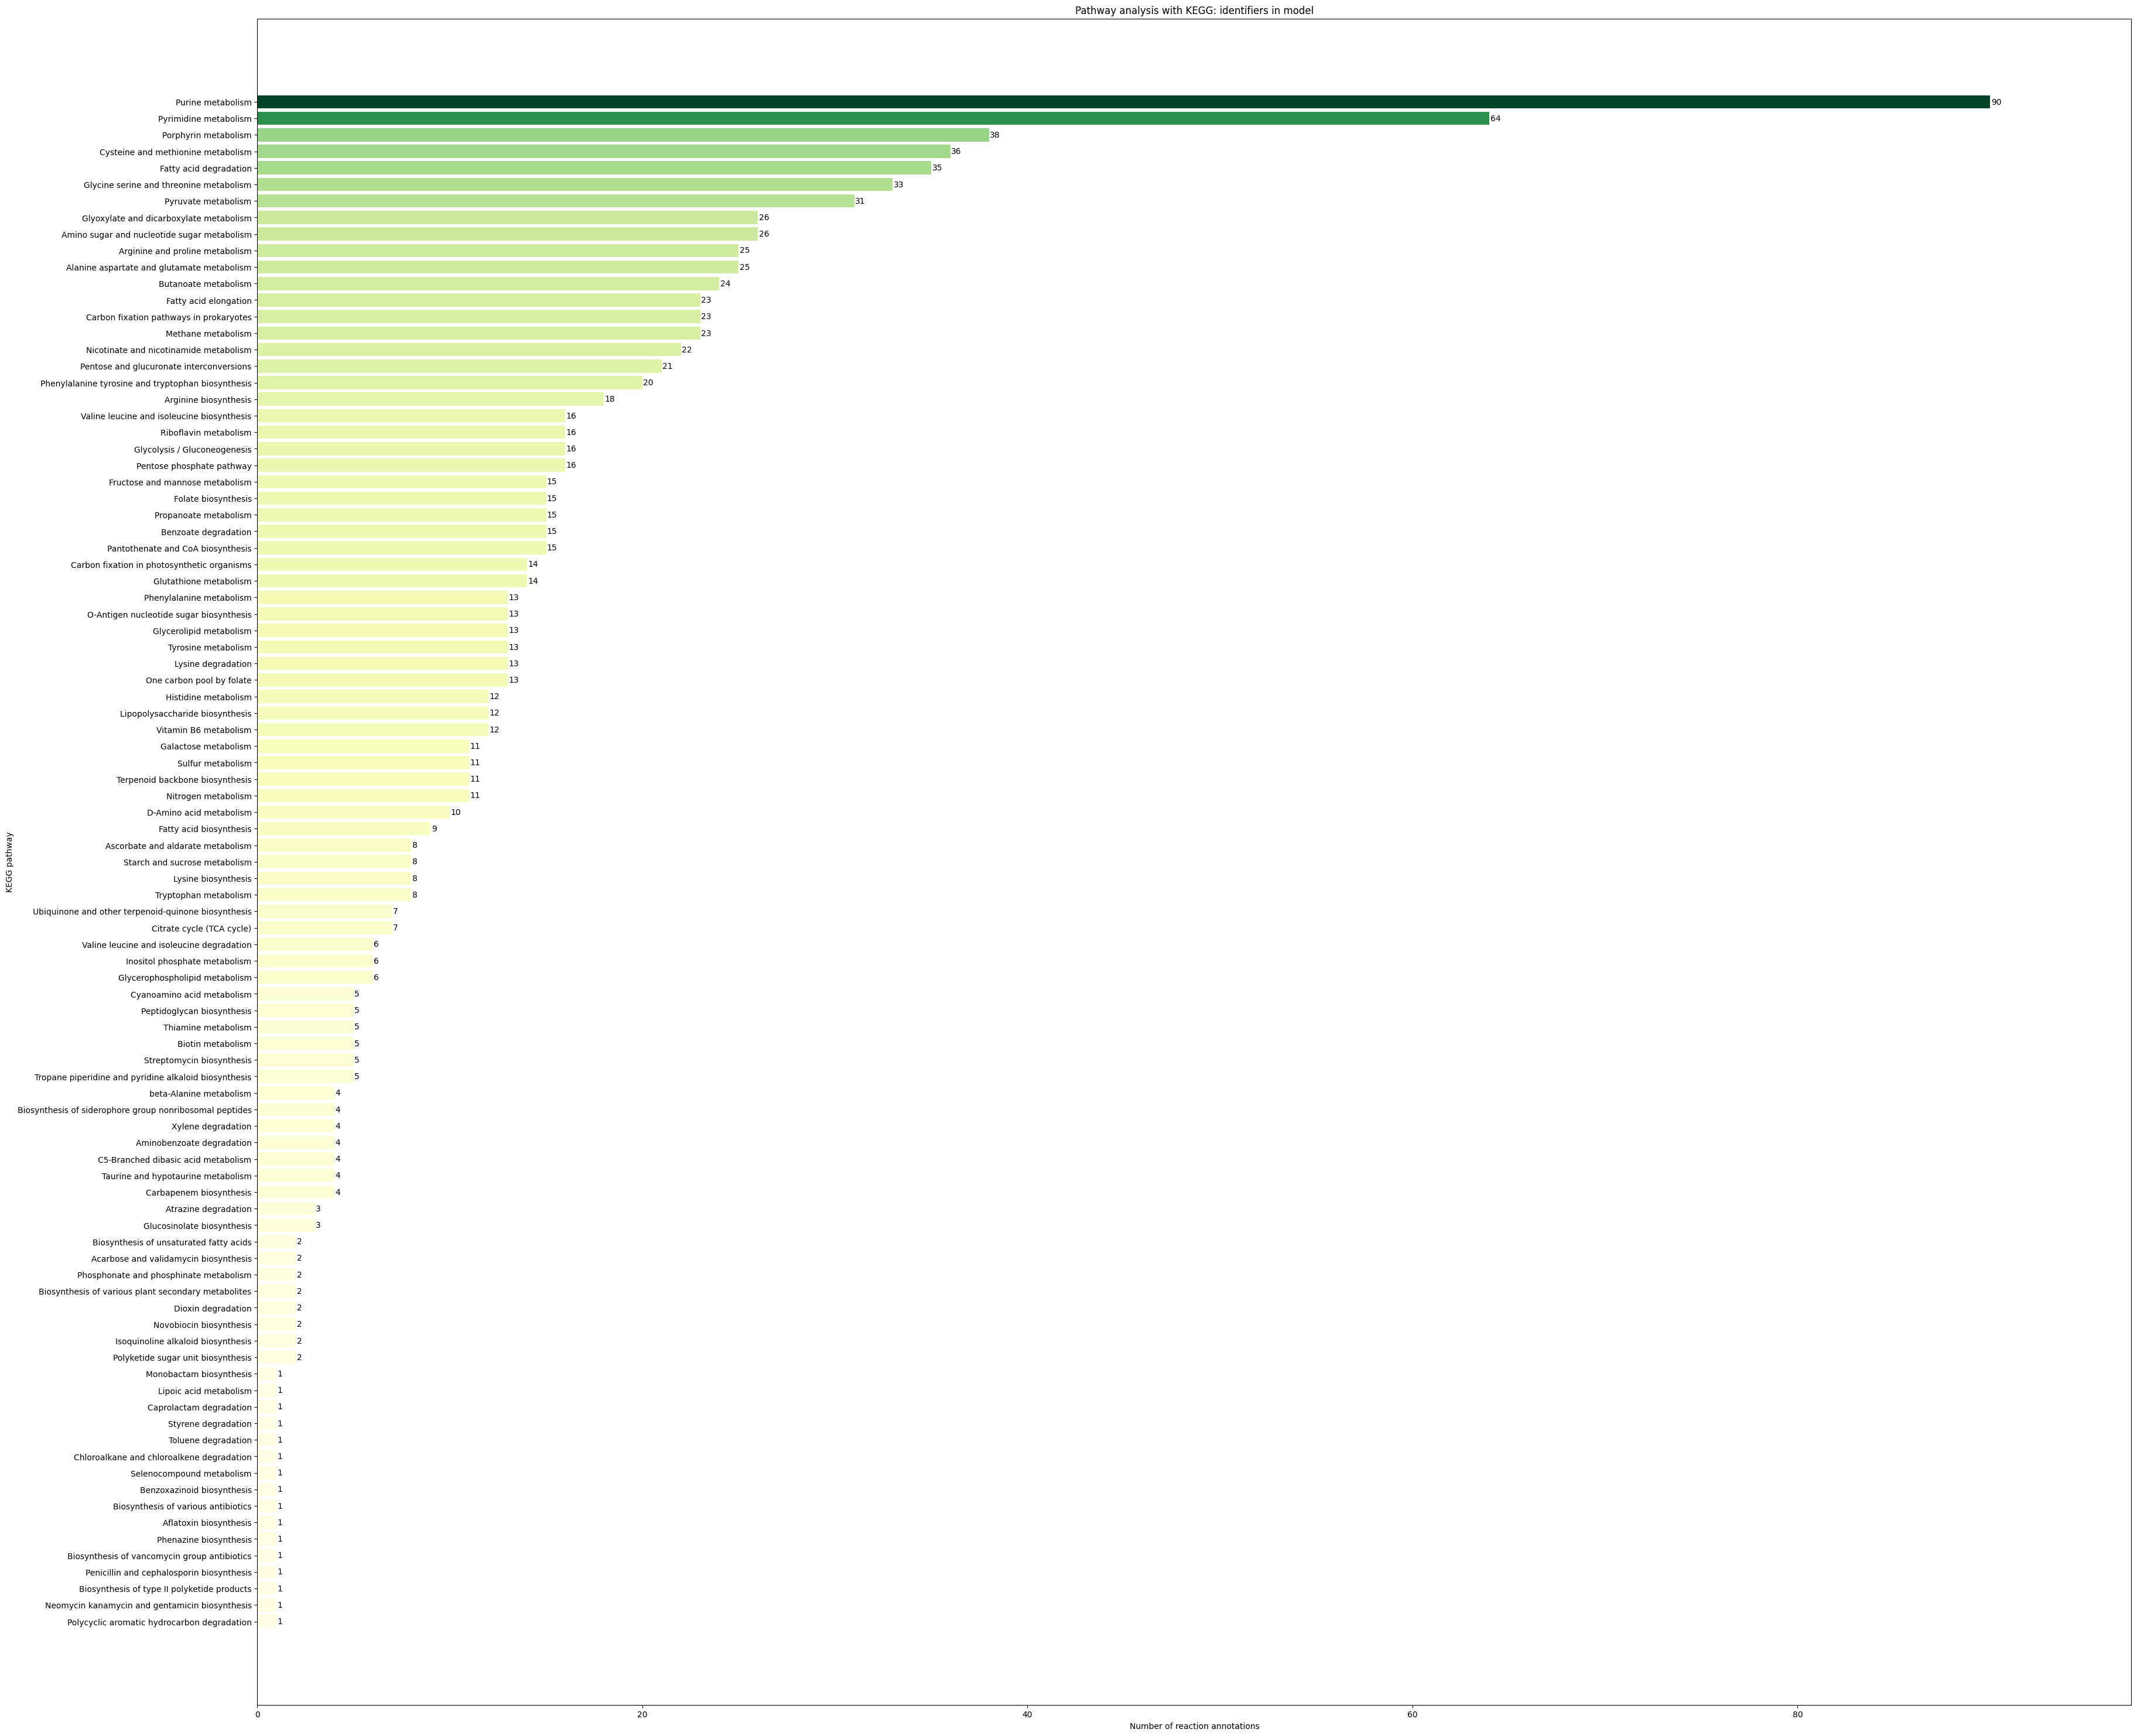

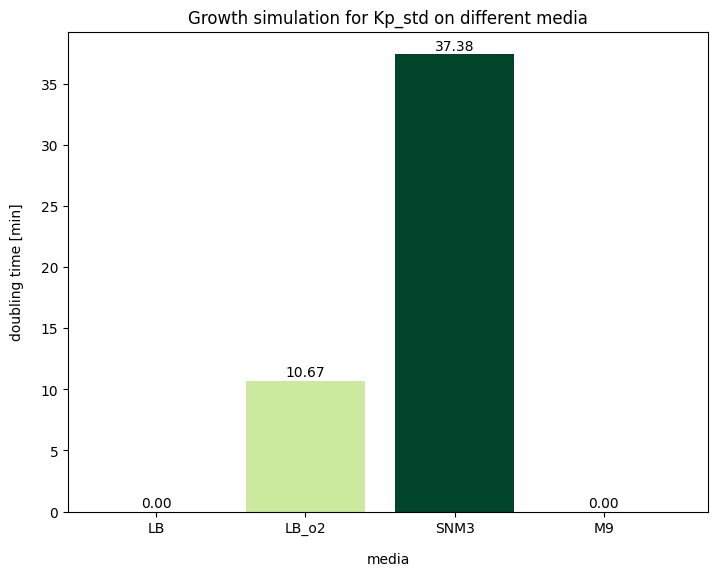

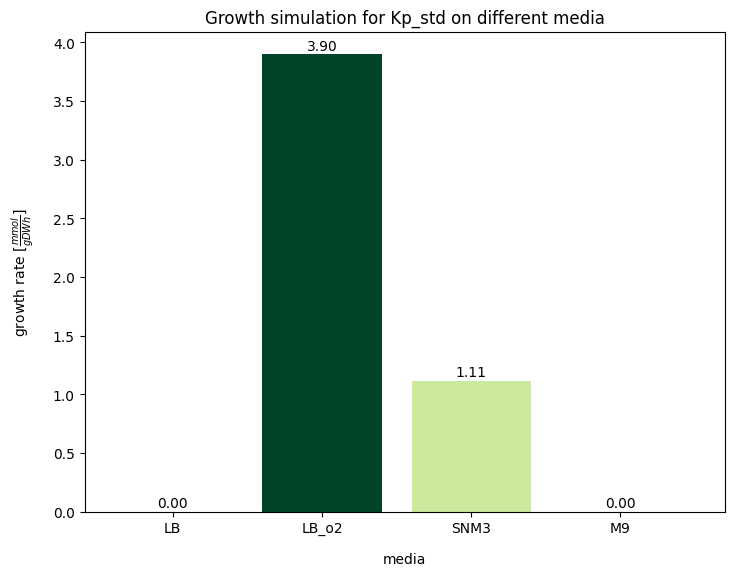

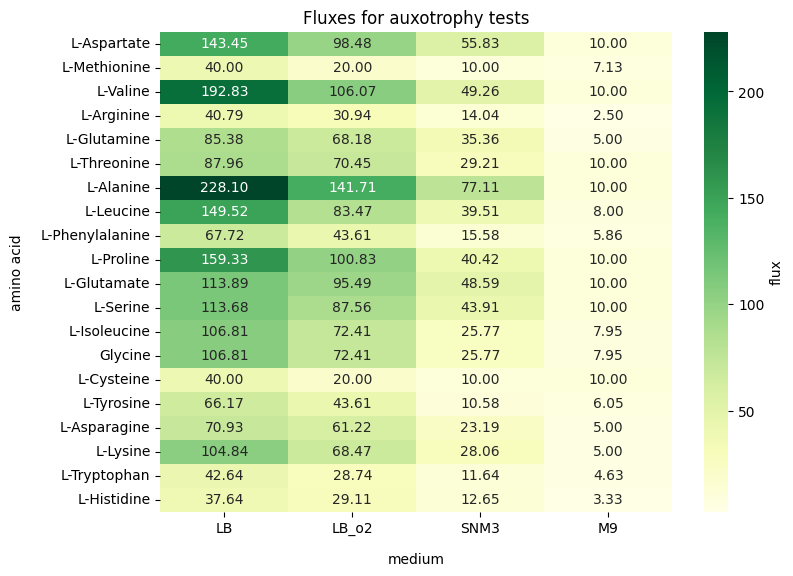

In [ ]:
# analysis
# 
# works, save for a couple of warning from cobra-internal stuff

from specimen.core import analysis

model_path = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/thesis/Kp_std/03_refinement/step4-smoothing/Kp_std_smooth.xml'
dir = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing'
media_path= '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/testing/media_config.yml'
namespace='BiGG'
pc_model_path=None
pc_based_on='id'
test_aa_auxotrophies=True
pathway=True

analysis.run(model_path, dir, 
        media_path, namespace,
        pc_model_path, pc_based_on, 
        test_aa_auxotrophies, pathway)

### Test CMPB

/Users/brune/Documents/10_Code/refinegems/build/__editable__.refineGEMs-1.4.2-py3-none-any/refinegems/classes/reports.py:234: UserWarning: Model is not able to grow sensible on any medium. Returning empty figure.
  warnings.warn('Model is not able to grow sensible on any medium. Returning empty figure.')


Active reaction but reversible R_GALpts
Active reaction but reversible R_LACpts

Assign SBO terms via E.C. numbers: 



100%|██████████| 1538/1538 [01:40<00:00, 15.28it/s]



Model with SBO annotations written to /var/folders/xd/zl0vk7sj60xcc0zmc4k4mxxc0000gr/T/tmpkh80eow5/dud.xml ...

	Duplicate metabolite(s) nh3_c, nh4_c found.
	Duplicate metabolite(s) fdxo_2_2_c, fdxox_c found.
	Duplicate metabolite(s) metox_c, metsox_S__L_c found.
	Duplicate metabolite(s) dscl_c, shcl_c found.
	Duplicate metabolite(s) scl_c, srch_c found.
	Duplicate metabolite(s) orn__L_c, orn_c found.
	Duplicate metabolite(s) metox_e, metsox_S__L_e found.
	Duplicate reactions OPETDC, OPTCCL found.
	Duplicate reactions THZPSN, THZPSN_1 found.


/Users/brune/Documents/10_Code/refinegems/build/__editable__.refineGEMs-1.4.2-py3-none-any/refinegems/classes/reports.py:234: UserWarning: Model is not able to grow sensible on any medium. Returning empty figure.
  warnings.warn('Model is not able to grow sensible on any medium. Returning empty figure.')
                which is outside of the 1e-03 margin from 1 mmol / g[CDW] / h.
                
ERROR:root:Error getting formula for 12dgr120 in bigg.metabolite:
Traceback (most recent call last):
  File "/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/requests/models.py", line 974, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/simplejson/__init__.py", line 514, in loads
    return _default_decoder.decode(s)
  File "/Users/brune/miniconda3/envs/sprg/lib/python3.10/site-packages/simplejson/decoder.py", line 386, in decode
    obj, end = self.raw_decode(s)
  File "/Users/brune/miniconda3/env

Creating new directory /Users/brune/Documents/11_Test_Data/test_SPECIMEN/cmpb/testrun/cmpb_out/misc/kegg_pathway/pathway-analysis
============================= test session starts ==============================
platform darwin -- Python 3.10.14, pytest-8.0.0, pluggy-1.4.0
rootdir: /Users/brune
plugins: anyio-4.3.0, typeguard-4.3.0
collected 146 items / 1 skipped

../../../../miniconda3/envs/sprg/lib/python3.10/site-packages/memote/suite/tests/test_annotation.py . [  0%]
..FFFFFFFFF.FFFFFFFFFFFFFFFFFFFFF...F......F.....FF.F.F.FF.FFF..         [ 44%]
../../../../miniconda3/envs/sprg/lib/python3.10/site-packages/memote/suite/tests/test_basic.py . [ 45%]
.....F........F..FFFFF                                                   [ 60%]
../../../../miniconda3/envs/sprg/lib/python3.10/site-packages/memote/suite/tests/test_biomass.py . [ 60%]
........F                                                                [ 67%]
../../../../miniconda3/envs/sprg/lib/python3.10/site-packages/memote/suite/

/Users/brune/Documents/10_Code/refinegems/build/__editable__.refineGEMs-1.4.2-py3-none-any/refinegems/classes/reports.py:234: UserWarning: Model is not able to grow sensible on any medium. Returning empty figure.
  warnings.warn('Model is not able to grow sensible on any medium. Returning empty figure.')


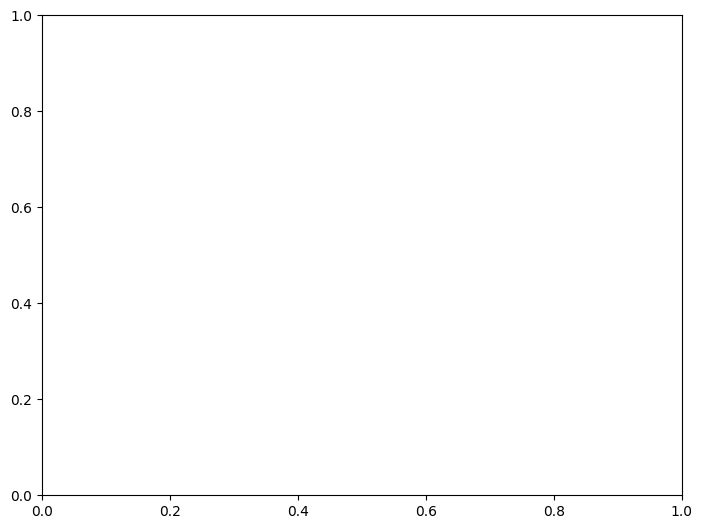

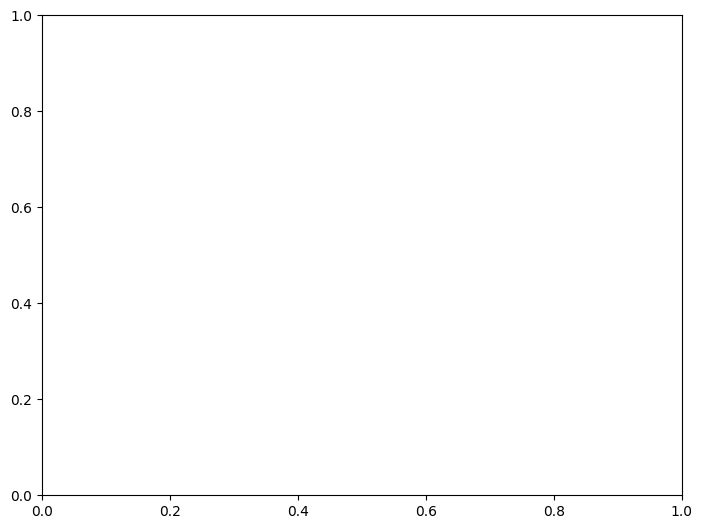

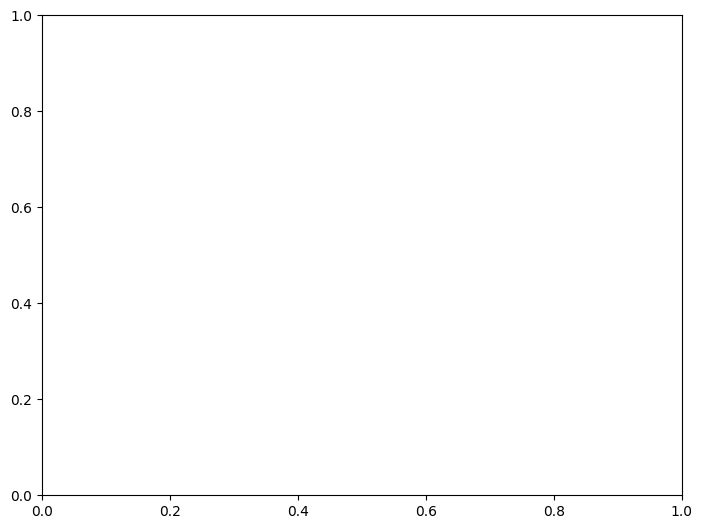

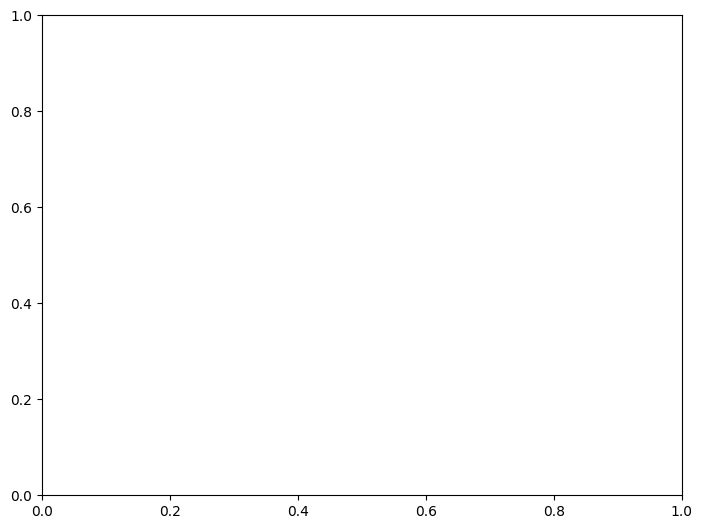

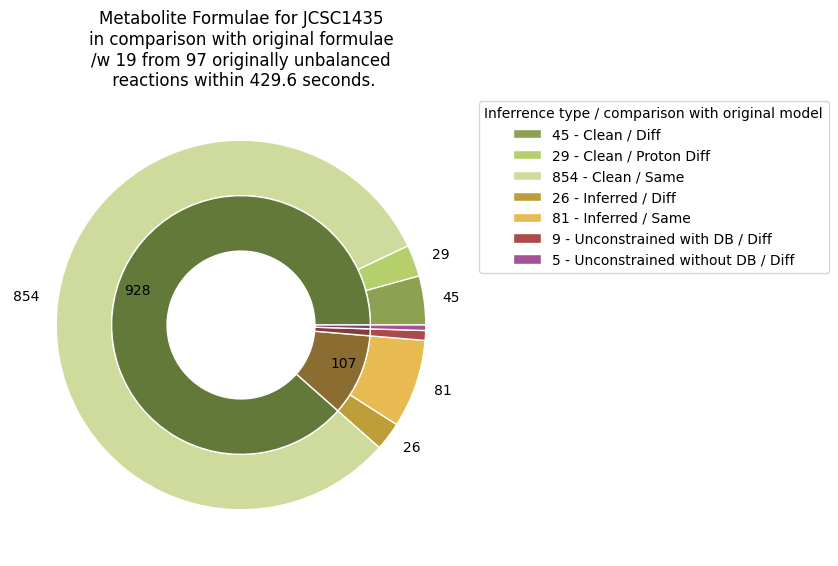

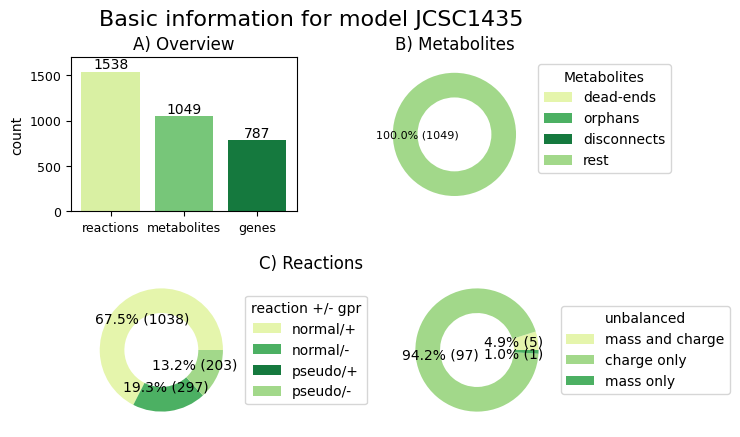

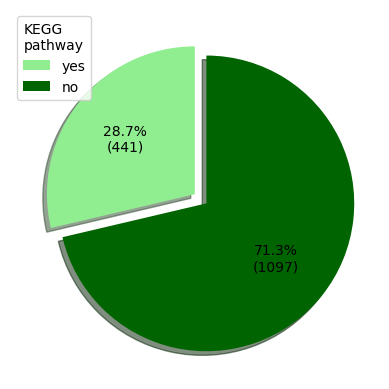

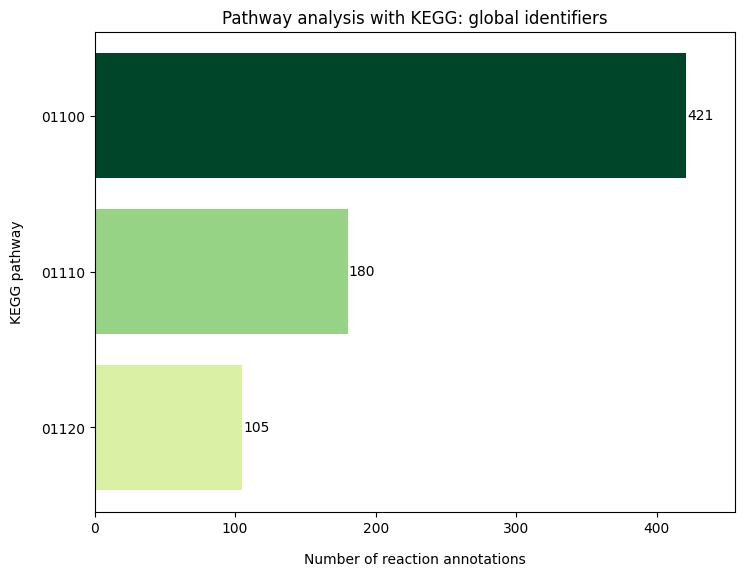

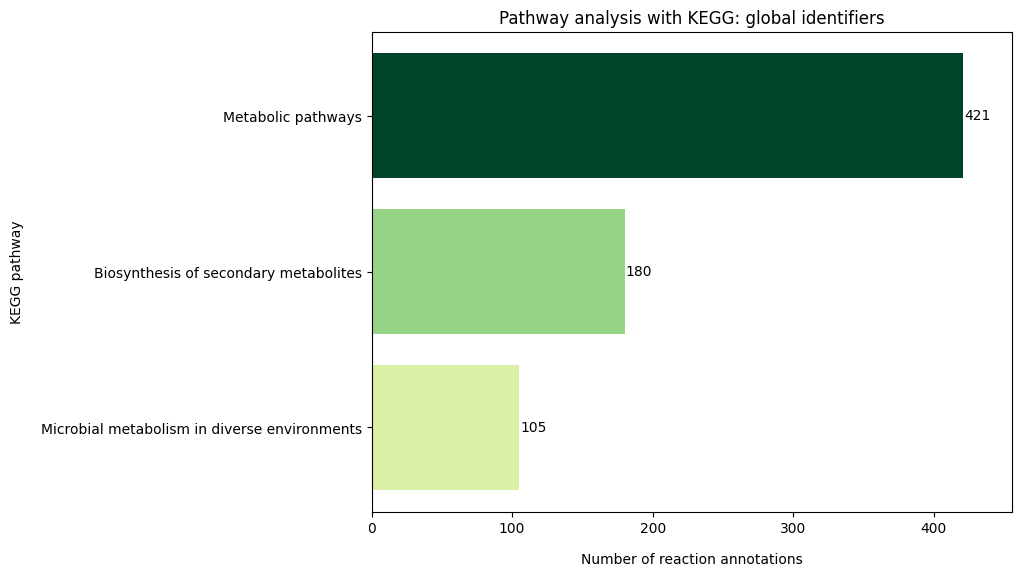

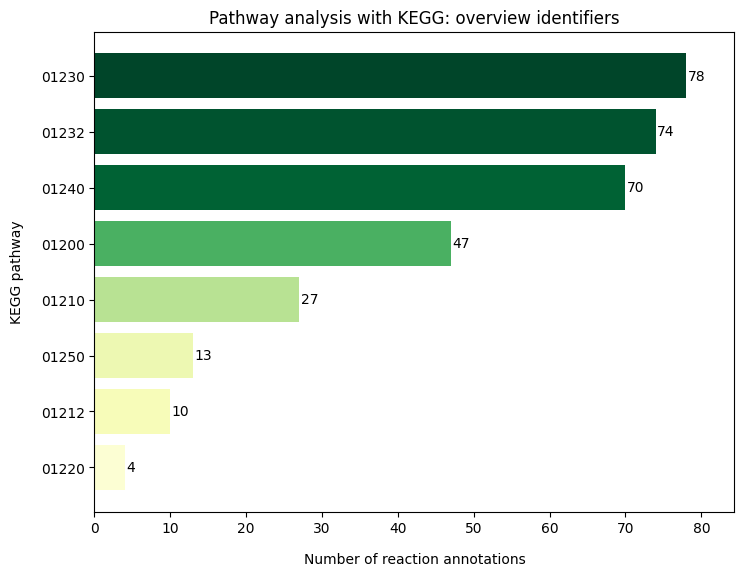

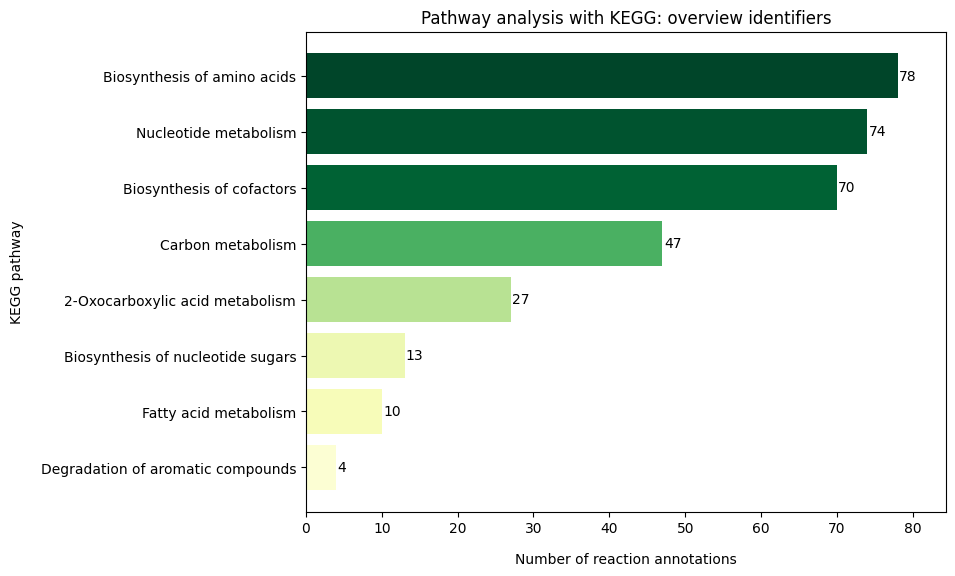

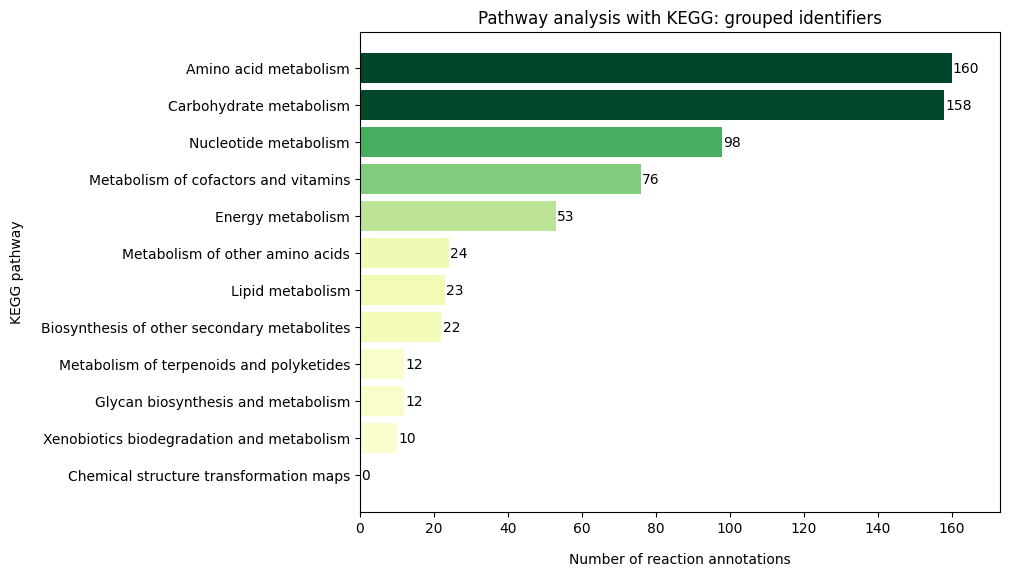

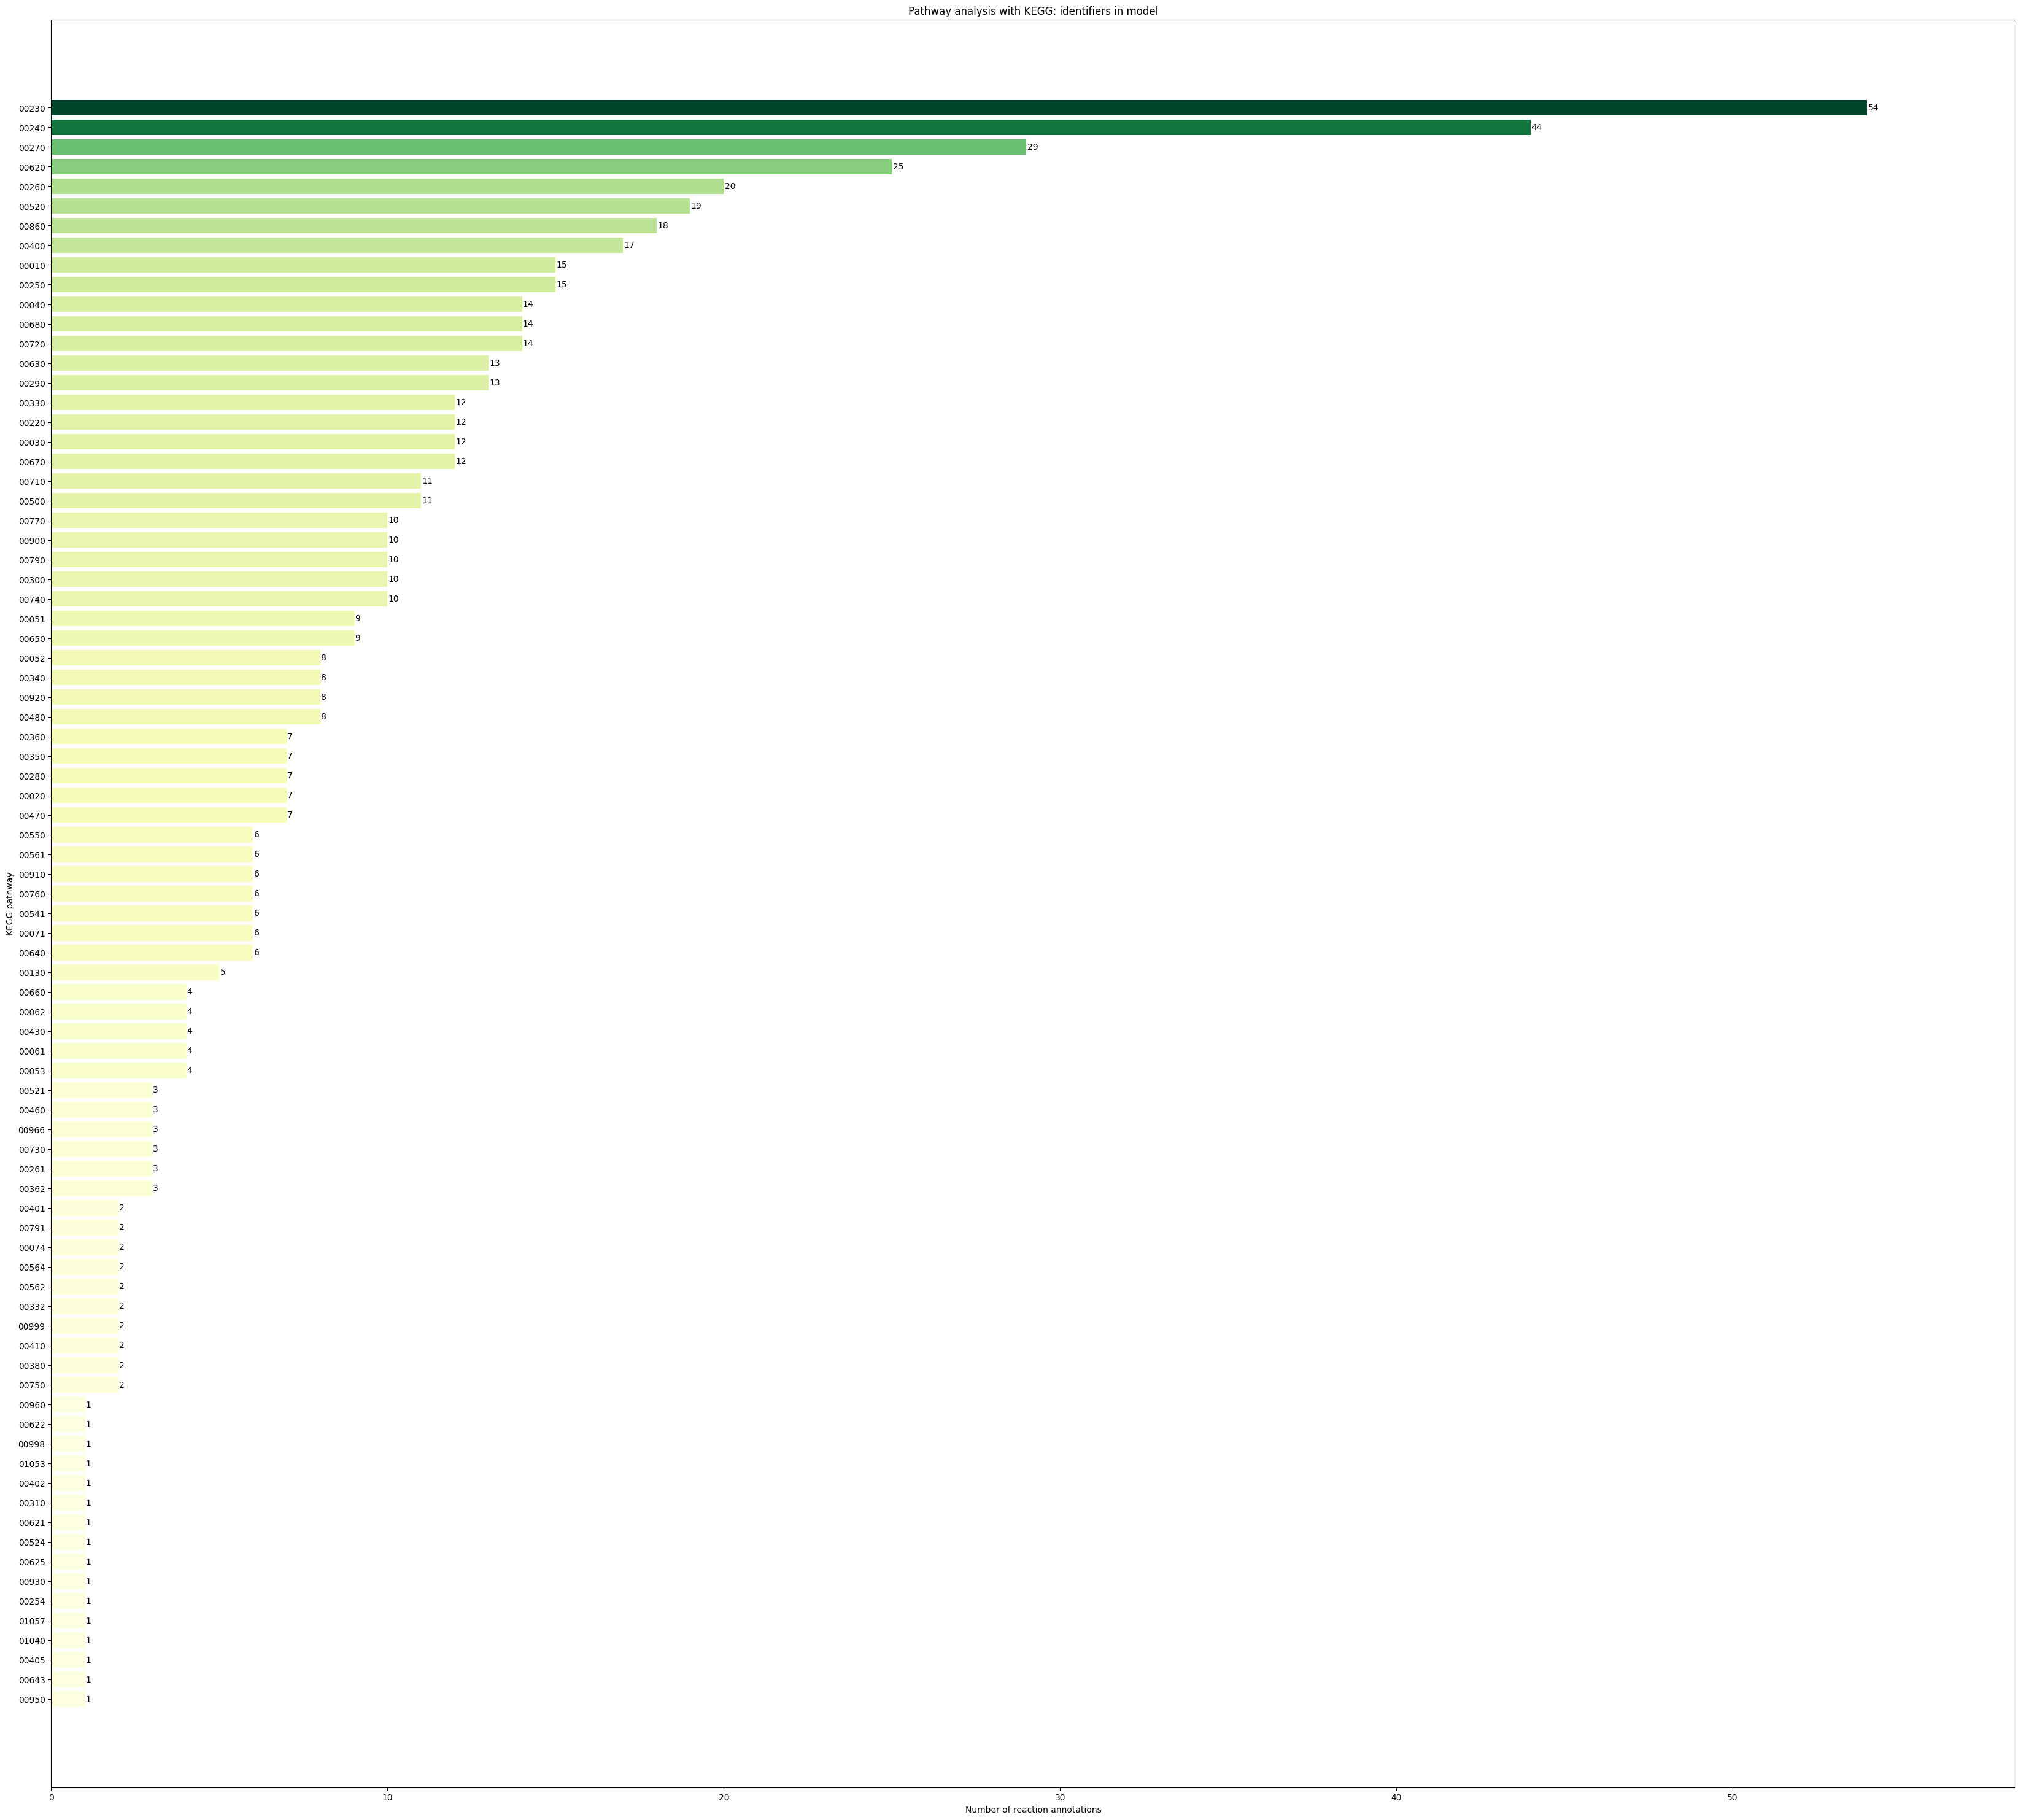

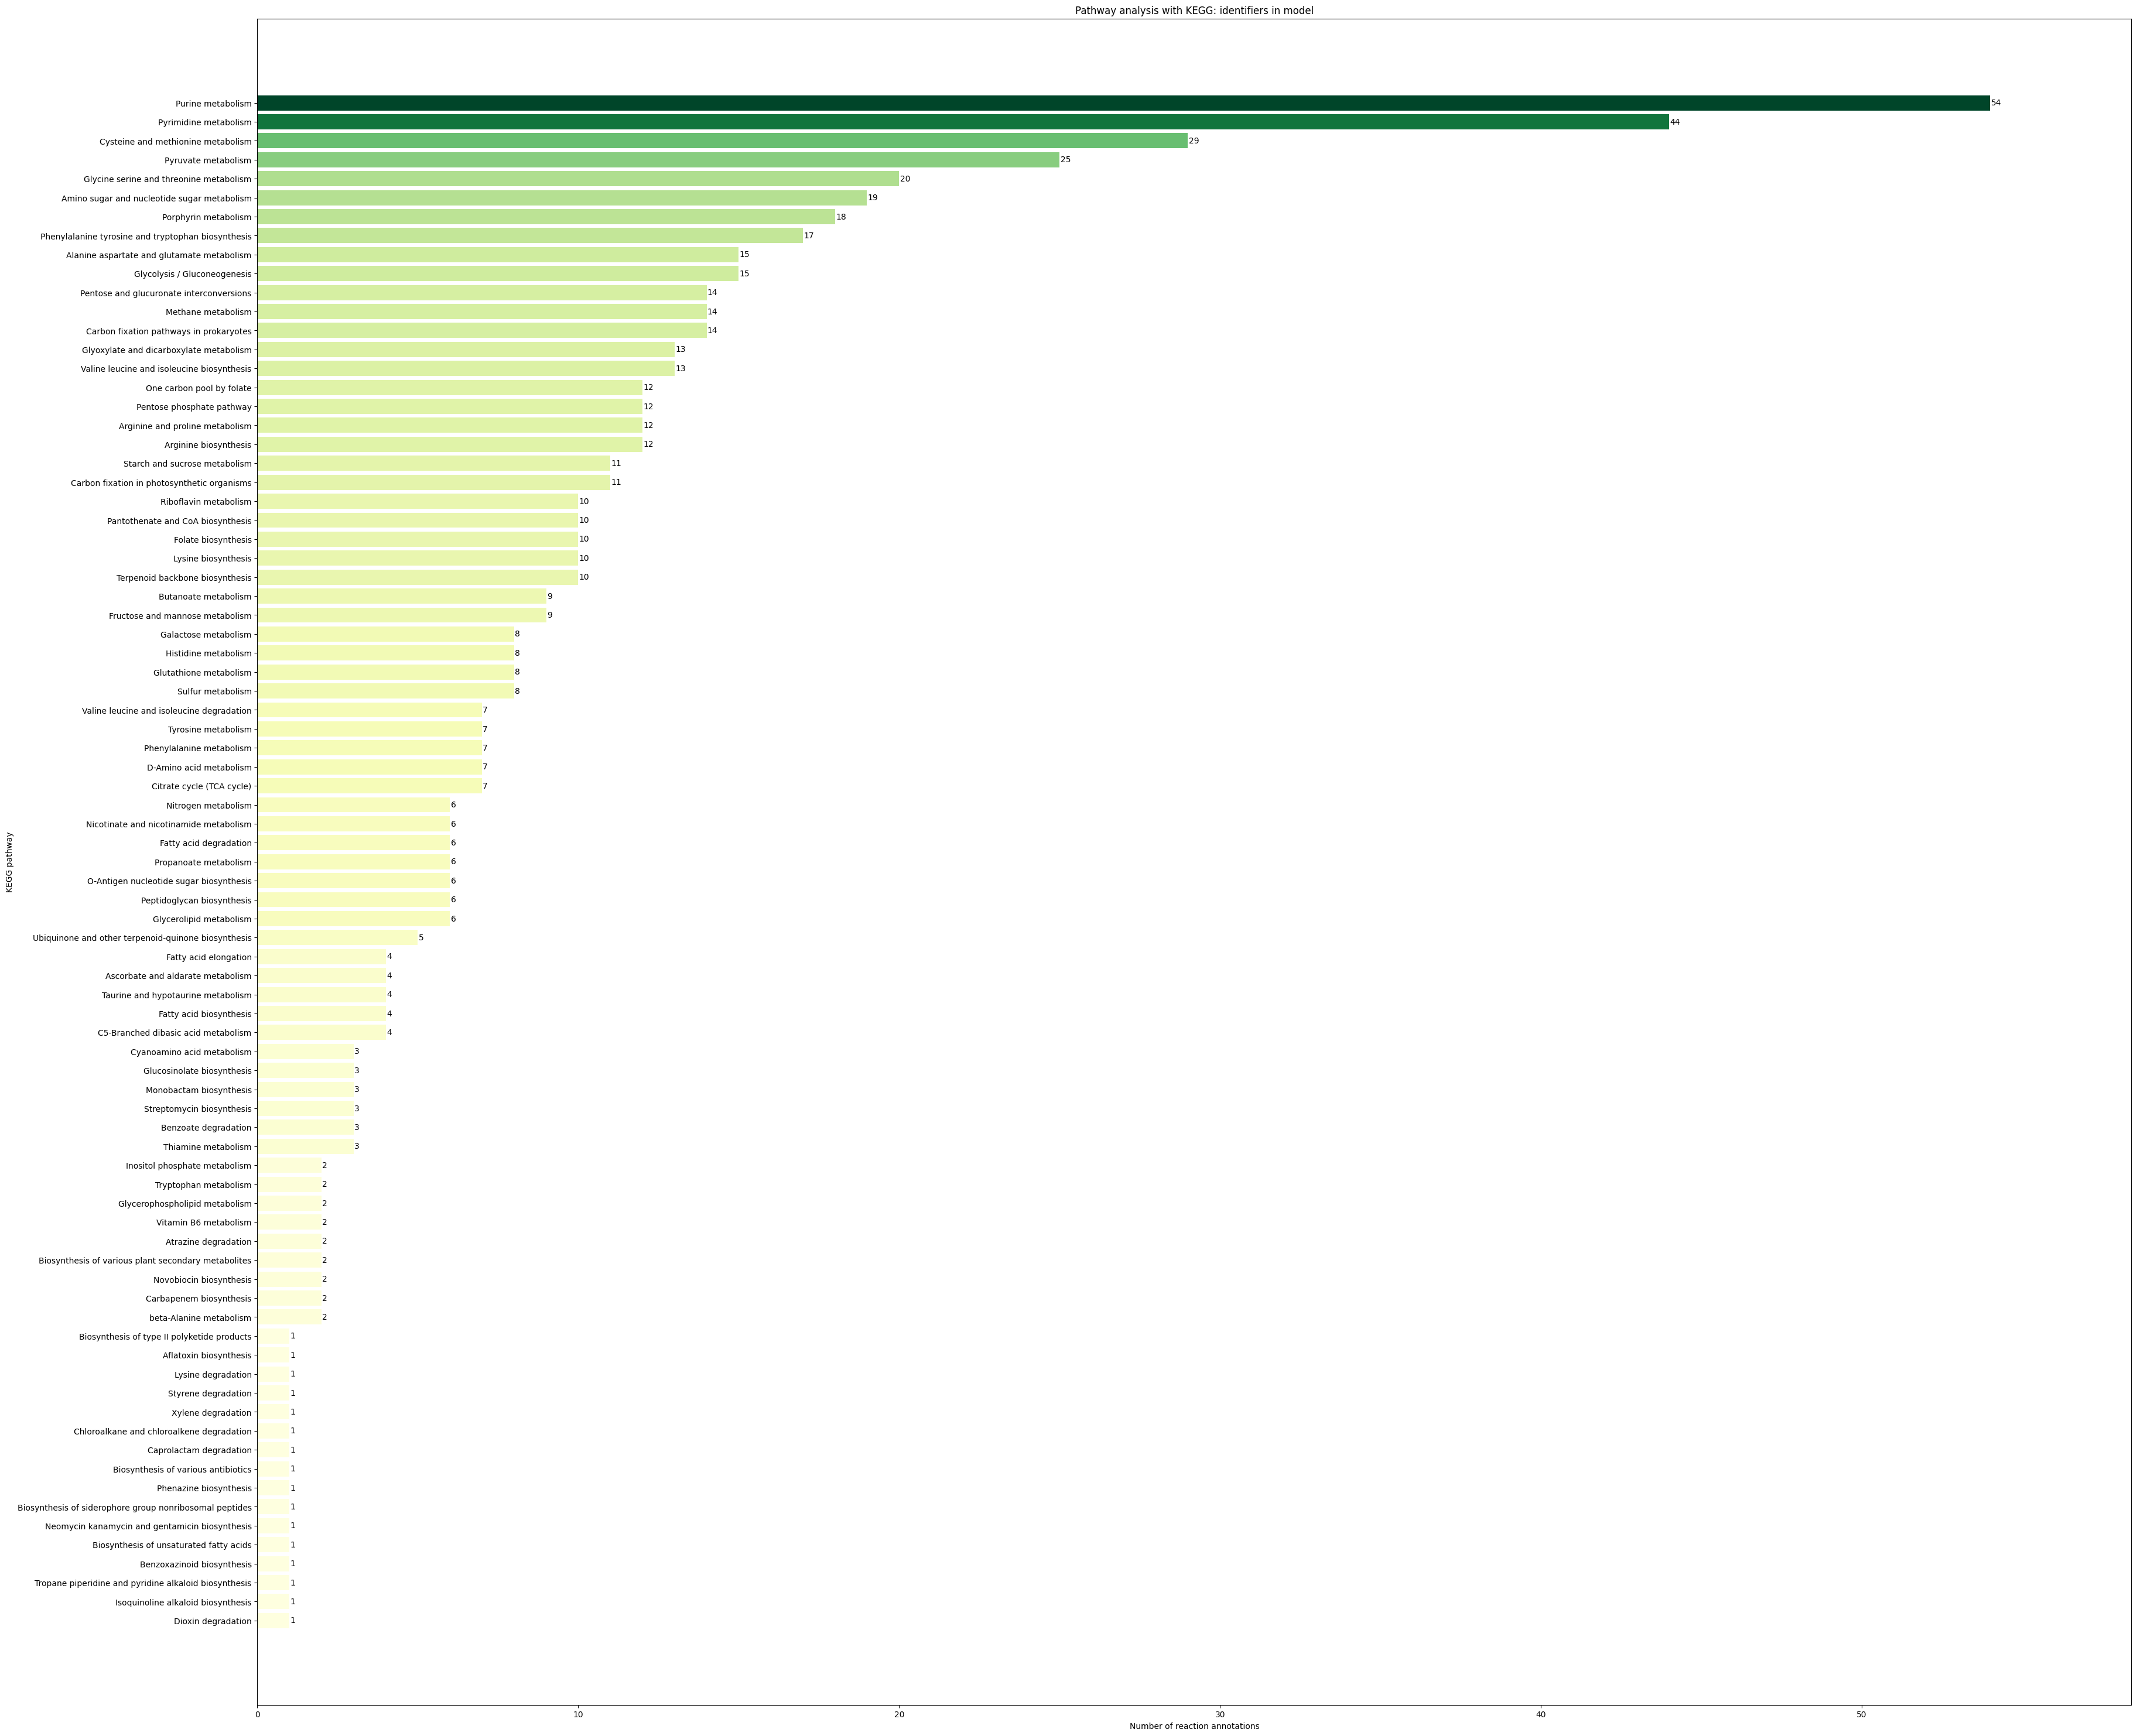

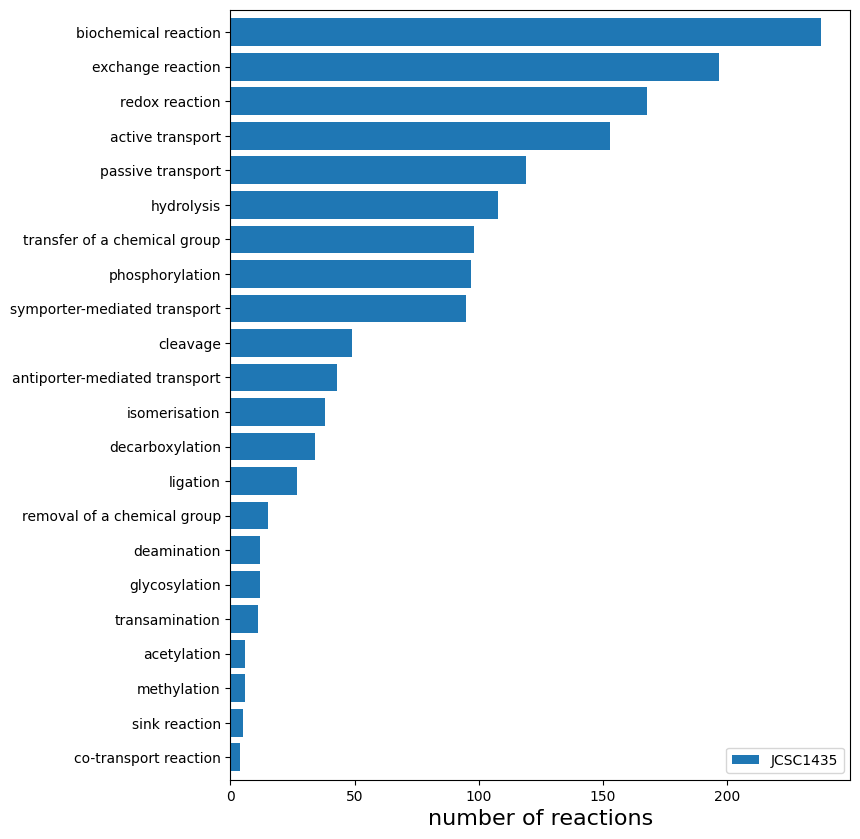

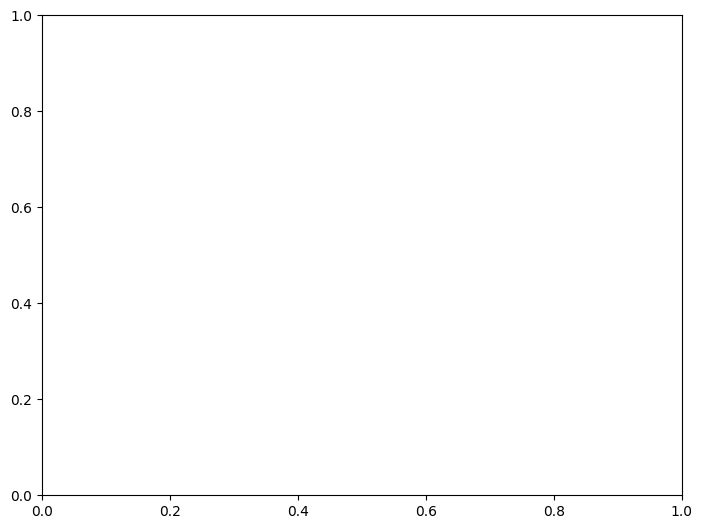

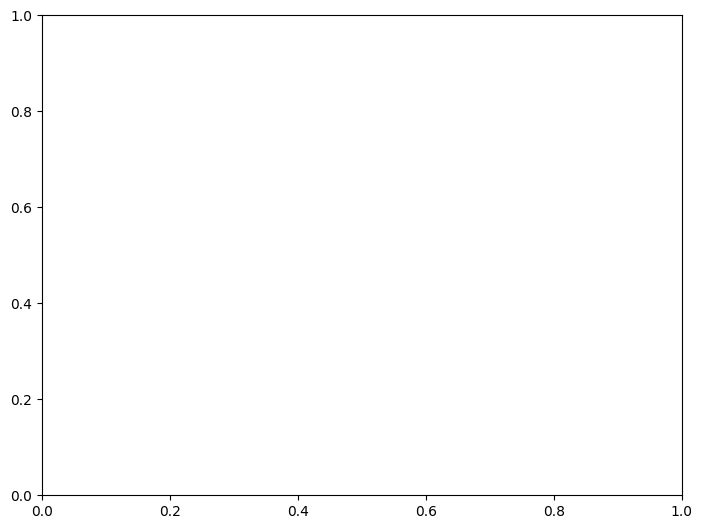

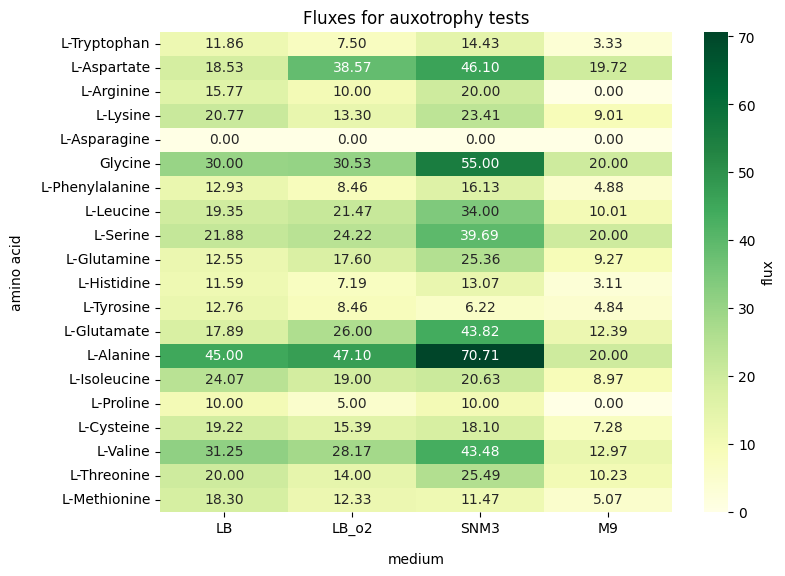

In [2]:
from specimen.cmpb.workflow import run

cfg = '/Users/brune/Documents/11_Test_Data/test_SPECIMEN/cmpb/config.yaml'
run(cfg)